<h1 style="text-align:center">Deep Learning  Lab Session </h1>
<h1 style="text-align:center">First Lab Session - 3 Hours </h1>
<h1 style="text-align:center">Artificial Neural Networks for Handwritten Digits Recognition</h1>

<b> Student 1:</b> Mario Guerriero <br>
<b> Group name:</b> deeplearn45
 
 
The aim of this session is to practice with Artificial Neural Networks. Answers and experiments should be made by groups of two students. Each group should fill and run appropriate notebook cells. 

To generate your final report and upload it on the submission website http://bigfoot-m1.eurecom.fr/teachingsub/login (using your deeplearnXX/password). Do not forget to run all your cells before generating your final report and do not forget to include the names of all participants in the group. The lab session should be completed ans submitted by April 13th 2018 (23:59:59 CET). 

# Introduction

During this lab session, you will implement, train and test a Neural Network
for the Handwritten Digits Recognition problem <a href="http://yann.lecun.com/exdb/mnist/"> [1] </a> with  different settings of hyperparameters. You will use the MNIST dataset which was constructed from scanned documents available from the National Institute of Standards and Technology (NIST). Images of digits were taken from a variety of scanned documents, normalized in size and centered. 


<img src="Nimages/mnist.png" alt="MNIST" width="350" height="500" align="center">
<center><span>Figure 1: MNIST digits examples</span></center>


This assignment includes a written part of programms to help you understand how to build and train
your neural net and then to test your code and get results. 

1. <a href="NeuralNetwork.py"> NeuralNetwork.py </a> 
2. <a href="transfer_functions.py"> transfer_functions.py </a> 
3.  <a href="utils.py "> utils.py </a> 


Functions defined inside the python files mentionned above can be imported  using the python command "from filename import function".

You will use the following libraries:

1. <a href="http://cs231n.github.io/python-numpy-tutorial/"> numpy </a>: for creating arrays and using methods to manipulate arrays;

2. <a href="http://matplotlib.org/"> matplotlib  </a>: for making plots.

Before starting the lab, please launch the cell below. After that, you may not need to do any imports during the lab.

In [17]:
# All imports
from NeuralNetwork import NeuralNetwork
from transfer_functions import *
from utils import *
import numpy as np
import matplotlib
import time, random

In [18]:
# I'm just redefining some plotting utility functions
def plot_curve(ax, t,s,metric):
    ax.plot(t, s)
    ax.set_ylabel(metric) # or ERROR
    ax.set_xlabel('Epoch')
    ax.set_title('Learning Curve_'+str(metric))
    ax.grid()
    
def plot_train_val(ax, t, st, sv, metric):
    ax.plot(t, st, label='Accuracy on training set')
    ax.plot(t, sv, label='Accuracy on validation set')
    ax.set_ylabel(metric) # or ERROR
    ax.set_xlabel('Epoch')
    ax.set_title('Learning Curve: '+str(metric))
    ax.grid()

def plot_training(t1, st1, sv1, metric1, t2, s2, metric2):
    """
    This function is used to plot accuracy and loss value side by side
    """
    f, axarr = plt.subplots(1,2)
    f.set_size_inches((16, 6))
    plot_train_val(axarr[0], t1, st1, sv1, metric1)
    plot_curve(axarr[1], t2, s2, metric2)
    plt.tight_layout()
    plt.show()

# Section 1 :  Your First Neural Network

<b>Part 1</b>: Before designing and writing your code, you will first work on a neural network by hand. 
Consider the following neural network with two inputs $x=(x_1,x_2)$, one hidden layer and a single output unit $y$.
The initial weights are set to random values. Neurons 6 and 7 represent biases. Bias values are equal to 1. You will consider a training sample whose feature vector is $x = (0.8, 0.2)$ and whose label is $y = 0.4$.

Assume that neurons have a sigmoid activation function  $f(x)=\frac{1}{(1+e^{-x})}$. The loss function $L$ is a Mean Squared Error (MSE): if $o$ denotes the output of the neural network, then the loss for a given sample $(o, y)$ is $L(o, y) = \left|\left| o - y \right|\right|^2$. In the following, you will assume that if you want to backpropagate the error on a whole batch, you will backpropagate the average error on that batch. More formally, let $((x^{(1)}, y^{(1)}), ..., (x^{(N)}, y^{(N)}))$ be a batch and $o^{(k)}$ the output associated to $x^{(k)}$. Then the total error $\bar{L}$ will be as follows:

<div align="center">$\bar{L} = \frac{1}{N} \sum_{k=1}^{N} L(o^{(k)}, y^{(k)})$.</div>




<img src="Nimages/NN.png", width="700" height="900"> 
<center><span>Figure 2: Neural network </span></center>


<b>Question 1.1.1</b>: Compute the new values of weights $w_{i,j}$ after a forward pass and a backward pass, and the outputs of the neural network before and after the backward path, when the learning rate is $\lambda$=5.
$w_{i,j}$ is the weight of the connexion between neuron $i$ and neuron $j$. Please detail your computations in the cell below and print your answers.

In [19]:
lr = 5.0
x1, x2, x6, x7 = 0.8, 0.2, 1.0, 1.0
w13, w14, w23, w24, w63, w64 = 0.3, -0.5, 0.8, 0.2, 0.2, -0.4
w35, w45, w75 = -0.6, 0.4, 0.5
y = 0.4

# Compute the output for each neuron
x3 = sigmoid(w13 * x1 + w23 * x2 + w63 * x6)
x4 = sigmoid(w14 * x1 + w24 * x2 + w64 * x6)
x5 = sigmoid(w35 * x3 + w45 * x4 + w75 * x7) # this is also the output of the network

print("=== FORWARD PASS 1 ===")
print("Output =", x5)

# Compute error's derivatives w.r.t. the activation
dE_du5 = (x5 - y) * x5 * (1 - x5)

dE_du3 = (dE_du5 * w35) * (x3 * (1 - x3))
dE_du4 = (dE_du5 * w45) * (x4 * (1 - x4))
dE_du7 = (dE_du5 * w75) * (x7 * (1 - x7))

# Compute error's derivatives w.r.t. the weights
N = 1 # We need to multiply the error derivatives by 2/N
d_w35 = 2/N * dE_du5 * x3
d_w45 = 2/N * dE_du5 * x4
d_w75 = 2/N * dE_du5 * x7

d_w13 = 2/N * dE_du3 * x1
d_w14 = 2/N * dE_du4 * x1
d_w23 = 2/N * dE_du3 * x2
d_w24 = 2/N * dE_du4 * x2
d_w63 = 2/N * dE_du3 * x6
d_w64 = 2/N * dE_du4 * x6

# Update the weights
w13 -= lr*d_w13
w14 -= lr*d_w14
w23 -= lr*d_w23
w24 -= lr*d_w24
w63 -= lr*d_w63
w64 -= lr*d_w64
w35 -= lr*d_w35
w45 -= lr*d_w45
w75 -= lr*d_w75

print("=== BACKWARD PASS ===")
print("w13 =", w13)
print("w14 =", w14)
print("w23 =", w23)
print("w24 =", w24)
print("w63 =", w63)
print("w64 =", w64)
print("w35 =", w35)
print("w45 =", w45)
print("w75 =", w75)

# Compute the new neuron outputs
x3 = sigmoid(w13 * x1 + w23 * x2 + x6 * w63)
x4 = sigmoid(w14 * x1 + w24 * x2 + x6 * w64)
x5 = sigmoid(w35 * x3 + w45 * x4 + x7 * w75) # this is also the output of the network

print("=== FORWARD PASS 2 ===")
print("Output =", x5)

=== FORWARD PASS 1 ===
Output = 0.5597295991095776
=== BACKWARD PASS ===
w13 = 0.3432265432215471
w14 = -0.5273473101875394
w23 = 0.8108066358053868
w24 = 0.19316317245311515
w63 = 0.2540331790269339
w64 = -0.4341841377344243
w35 = -0.8541467506279605
w45 = 0.2745727217772572
w75 = 0.10637455535192797
=== FORWARD PASS 2 ===
Output = 0.40648823589210115


<div class='alert alert-success'>
As we were expecting, after one backward step, the neural network got closer to the solution.
</div>

<b>Part 2</b>: Neural Network Implementation

Please read all source files carefully and understand the data structures and all functions.
You are to complete the missing code. 
First you should define the neural network (using the NeuralNetwork class, see in the <a href="NeuralNetwork.py"> NeuralNetwork.py</a> file) and reinitialise weights. 
Then you will need to complete the feedforward() and the backpropagate() functions. 

<b>Question 1.2.1</b>: Implement the feedforward() function.

In [20]:
class NeuralNetwork(NeuralNetwork):
    def feedforward(self, inputs):
        self.o_input = np.array(inputs)
        # Append the bias to the input vector
        if len(inputs[0]) < self.input_layer_size:
            self.o_input = np.append(self.o_input, np.ones((len(inputs), 1)), axis=1)
        # Compute output for the first hidden layer
        self.u_hidden = np.dot(self.o_input, self.W_input_to_hidden)
        self.o_hidden = self.transfer_f(self.u_hidden)
        # Append the bias again
        if len(self.o_hidden[0]) < self.hidden_layer_size:
            self.o_hidden = np.append(self.o_hidden, np.ones((len(self.o_hidden), 1)), axis=1)
        # Compute network output
        self.u_output = np.dot(self.o_hidden, self.W_hidden_to_output)
        self.o_output = self.transfer_f(self.u_output)

<b>Question 1.2.2</b>: Test your implementation: create the Neural Network defined in Part 1 and see if the feedforward() function you implemented gives the same results as the ones you found by hand.

In [21]:
# First define your neural network
model = NeuralNetwork(2, 2, 1, transfer_f=sigmoid, transfer_df=dsigmoid)

# Then initialize the weights according to Figure 2
W_input_to_hidden = np.array([[0.3, -0.5], [0.8, 0.2], [0.2, -0.4]])
W_hidden_to_output = np.array([[-0.6], [0.4], [0.5]])
model.weights_init(W_input_to_hidden, W_hidden_to_output)

print('Weights between the input and the hidden layers:')
print(W_input_to_hidden)

print('Weights between the hidden and the output layers:')
print(W_hidden_to_output)

# Feed test values
test = [[0.8, 0.2]]
model.feedforward(test)

# Print the output
print("Output =", model.o_output)

Weights between the input and the hidden layers:
[[ 0.3 -0.5]
 [ 0.8  0.2]
 [ 0.2 -0.4]]
Weights between the hidden and the output layers:
[[-0.6]
 [ 0.4]
 [ 0.5]]
Output = [[0.5597296]]


<div class='alert alert-success'>
The above obtained result matches with the one obtained above after the manual calculations.
</div>

<b>Question 1.2.3</b>: Implement the backpropagate() function.

In [22]:
class NeuralNetwork(NeuralNetwork):
    def backpropagate(self, targets, learning_rate=5.0):
        # Compute the error derivatives w.r.t. the activation for each layer
        dE_du_hidden = np.multiply(self.o_output - targets, self.transfer_df(self.u_output))

        dE_du_output = np.multiply(dE_du_hidden.dot(self.W_hidden_to_output.T), self.o_hidden*(1-self.o_hidden))
        dE_du_output = np.delete(dE_du_output, -1, axis=1)

        # Compute error's derivatives w.r.t. the weights
        dE_dw_hidden = (2/len(targets)) * np.dot(dE_du_hidden.T, self.o_hidden).T
        dE_dw_output = (2/len(targets)) * np.dot(dE_du_output.T, self.o_input).T
        
        # Update weights
        self.W_hidden_to_output -= learning_rate * dE_dw_hidden
        self.W_input_to_hidden -= learning_rate * dE_dw_output

<b>Question 1.2.4</b>: Test your implementation: create the Neural Network defined in Part 1 and see if the backpropagate() function you implemented gives the same weight updates as the ones you found by hand. Do another forward pass and see if the new output is the same as the one you obtained in Question 1.1.1.

In [23]:
# First define your neural network
model = NeuralNetwork(2, 2, 1, transfer_f=sigmoid, transfer_df=dsigmoid)

# Then initialize the weights according to Figure 2
W_input_to_hidden = np.array([[0.3, -0.5], [0.8, 0.2], [0.2, -0.4]])
W_hidden_to_output = np.array([[-0.6], [0.4], [0.5]])
model.weights_init(W_input_to_hidden, W_hidden_to_output)

# Feed test values
test = [[0.8, 0.2]]
model.feedforward(test)

# Backpropagate
targets = [[0.4]]
model.backpropagate(targets)

# Print weights
print('Update weights value:')
print("W_input_to_hidden =", model.W_input_to_hidden)
print("W_hidden_to_output =", model.W_hidden_to_output)

# Feed test values again
model.feedforward(test)

# Print the output
print("Output =", model.o_output)

Update weights value:
W_input_to_hidden = [[ 0.34322654 -0.52734731]
 [ 0.81080664  0.19316317]
 [ 0.25403318 -0.43418414]]
W_hidden_to_output = [[-0.85414675]
 [ 0.27457272]
 [ 0.10637456]]
Output = [[0.40648824]]


<div class='alert alert-success'>
The obtained results match with the ones obtained in the above cell.
</div>

Checked your implementations and found that everything was fine? Congratulations! You can move to the next section.

# Section 2: Handwritten Digits Recognition

The MNIST dataset consists of handwritten digit images. It is split into a training set containing 60,000 samples and a test set containing 10,000 samples. In this Lab Session, the official training set of 60,000 images is divided into an actual training set of 50,000 samples a validation set of 10,000 samples. All digit images have been size-normalized and centered in a fixed size image of 28 x 28 pixels. Images are stored in byte form: you will use the NumPy python library to convert data files into NumPy arrays that you will use to train your Neural Networks.

You will first work with a small subset of MNIST (1000 samples), then on a very small subset of MNIST (10 samples), and eventually run a model on the whole one.

The MNIST dataset is available in the Data folder.
To get the training, testing and validation data, run the load_data() function.


In [24]:
# Just run that cell ;-)
training_data, validation_data, test_data = load_data()
small_training_data = (training_data[0][:1000], training_data[1][:1000])
small_validation_data = (validation_data[0][:200], validation_data[1][:200])
indices = [1, 3, 5, 7, 2, 0, 13, 15, 17, 4]
vsmall_training_data = ([training_data[0][i] for i in indices], [training_data[1][i] for i in indices])

Loading MNIST data .....
Done.


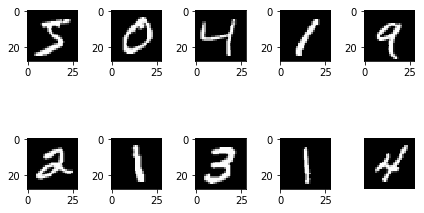

In [25]:
# And you can run that cell if you want to see what the MNIST dataset looks like
ROW = 2
COLUMN = 5
for i in range(ROW * COLUMN):
    # train[i][0] is i-th image data with size 28x28
    image = np.array(training_data[0][i]).reshape(28, 28)   
    plt.subplot(ROW, COLUMN, i+1)          
    plt.imshow(image, cmap='gray')  # cmap='gray' is for black and white picture.
plt.axis('off')  # do not show axis value
plt.tight_layout()   # automatic padding between subplots
plt.show()

<b>Part 1</b>: Build a bigger Neural Network

The input layer of the neural network that you will build contains neurons encoding the values of the input pixels. The training data for the network will consist of many 28 by 28 pixel images of scanned handwritten digits. Thus, the input layer contains 784=28×28 units. The second layer of the network is a hidden layer. We set the number of neurons in the hidden layer to 30. The output layer contains 10 neurons.

<b>Question 2.1.1</b>: Create the network described above using the NeuralNetwork class.

<div class='alert alert-success'>
Before starting I will redefine the train function because I want it to show two plots: the one of the accuracy and the one of the losses against the number of epochs.
</div>

In [26]:
class NeuralNetwork(NeuralNetwork):
    def train(self, data, validation_data, iterations=50, learning_rate=5.0, verbose=False):
        start_time = time.time()
        training_accuracies = []
        validation_accuracies = []
        errors = []
        inputs  = data[0]
        targets = data[1]
        best_val_acc = 100*self.predict(validation_data)/len(validation_data[0])
        best_i2h_W = self.W_input_to_hidden
        best_h2o_W = self.W_hidden_to_output
        losses = list()
        for it in range(iterations):
            self.feedforward(inputs)
            self.backpropagate(targets, learning_rate=learning_rate)
            error = targets - self.o_output
            error *= error
            training_accuracies.append(100*self.predict(data)/len(data[0]))
            validation_accuracies.append(100*self.predict(validation_data)/len(validation_data[0]))
            losses.append(np.sum(error)/len(targets))
            if validation_accuracies[-1] > best_val_acc:
                best_i2h_W = self.W_input_to_hidden
                best_h2o_W = self.W_hidden_to_output
            if verbose:
                print("[Iteration %2d/%2d]  -Training_Accuracy:  %2.2f %%  -Validation_Accuracy: %2.2f %%  -time: %2.2f " %(it+1, iterations,
                                                            training_accuracies[-1], validation_accuracies[-1], time.time() - start_time))
                print("    - MSE:", losses[-1])
        print("Training time:", time.time()-start_time)
        plot_training(range(1, iterations+1), training_accuracies, validation_accuracies, "Accuracy",
                     range(1, iterations+1), losses, 'MSE')

In [27]:
# Define your neural network
mnist_model = NeuralNetwork(784, 30, 10)

<b>Question 2.1.2</b>: Train your Neural Network on the small subset of MNIST (300 iterations) and print the new accuracy on test data. You will use small_validation_data for validation. Try different learning rates (0.1, 1.0, 10.0). You should use the train() function of the NeuralNetwork class to train your network, and the weights_init() function to reinitialize weights between tests. Print the accuracy of each model on test data using the predict() function.

In [28]:
print(len(test_data[0]))

10000


Training model with parameters:
 - Learning Rate: 0.1
Training time: 30.466032028198242


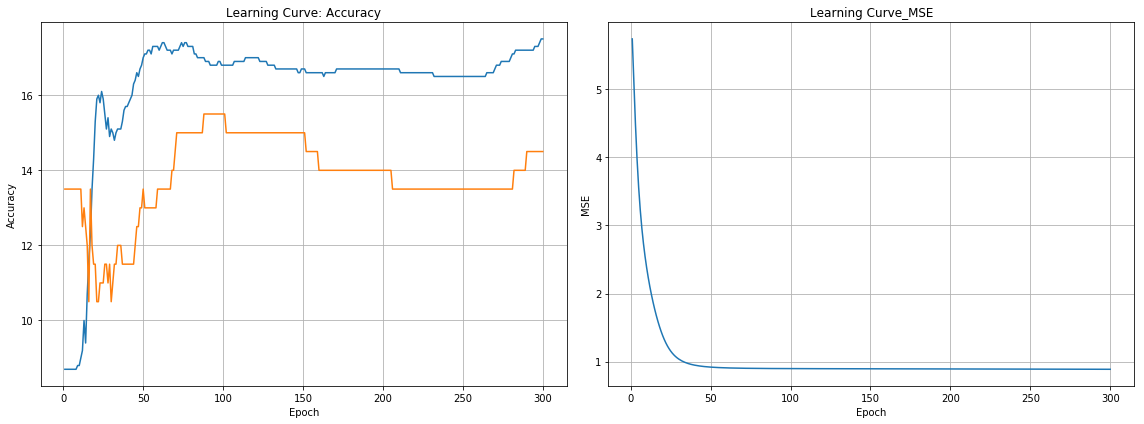

Obtained accuracy: 16.09%
-------------------------------------------
Training model with parameters:
 - Learning Rate: 1
Training time: 26.9151713848114


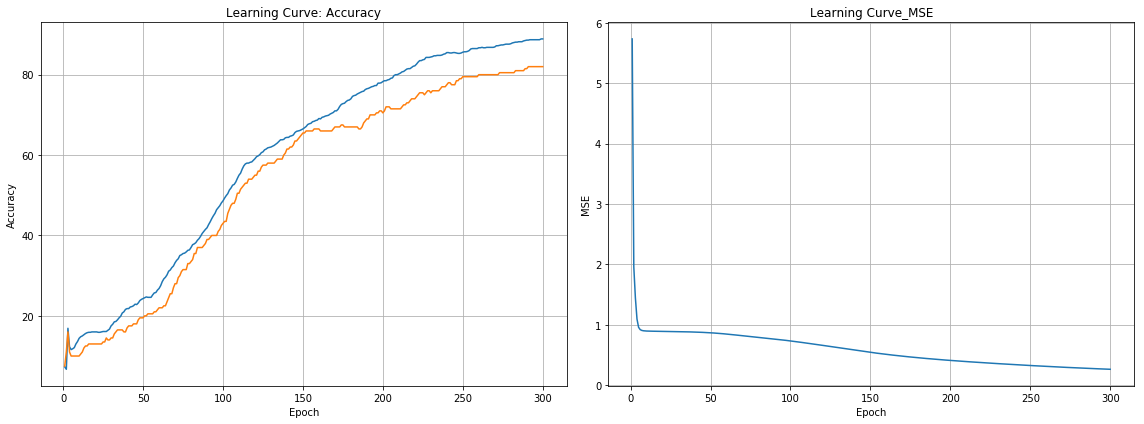

Obtained accuracy: 82.84%
-------------------------------------------
Training model with parameters:
 - Learning Rate: 10
Training time: 26.905328273773193


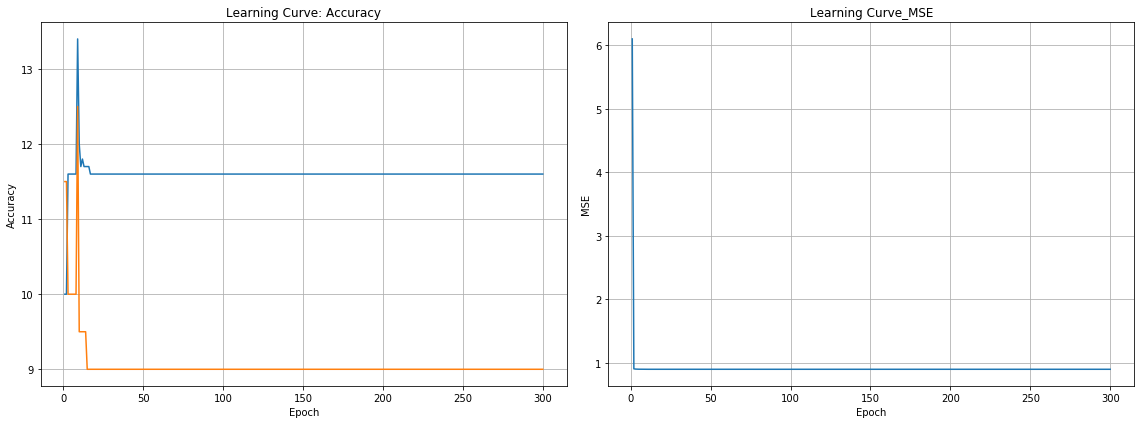

Obtained accuracy: 10.49%
-------------------------------------------


In [29]:
# Train NN and print accuracy on test data
n_iterations = 300

for lr in [0.1, 1, 10]:
    print('Training model with parameters:\n - Learning Rate: {}'.format(lr))
    mnist_model.train(small_training_data, small_validation_data, iterations=n_iterations, learning_rate =lr)
    # Compute accuracy
    acc = mnist_model.predict(test_data) / 100
    print('Obtained accuracy: {}%'.format(acc))
    print('-------------------------------------------')
    # Reinitialize model weights
    mnist_model.weights_init()

<b>Question 2.1.3</b>: Do the same with 15 and 75 hidden neurons.

Training model with parameters:
               - Hidden Neurons: 15
               - Learning Rate: 0.1
Training time: 18.60119915008545


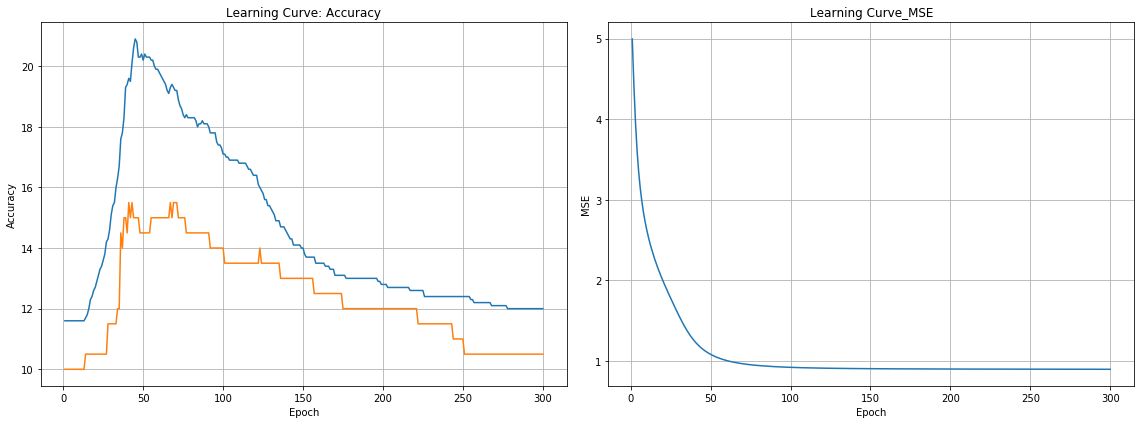

Obtained accuracy: 12.03%
-------------------------------------------
Training model with parameters:
               - Hidden Neurons: 15
               - Learning Rate: 1
Training time: 18.659220218658447


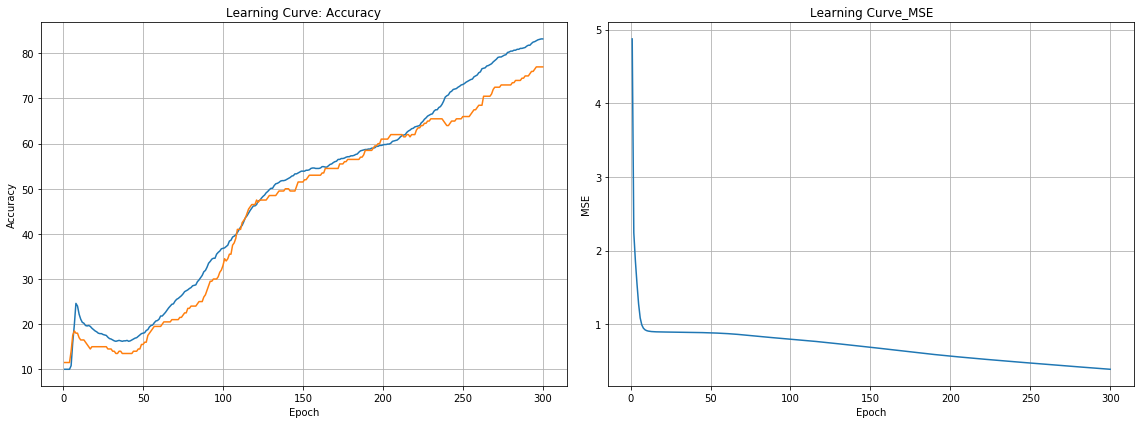

Obtained accuracy: 77.62%
-------------------------------------------
Training model with parameters:
               - Hidden Neurons: 15
               - Learning Rate: 10
Training time: 20.982309341430664


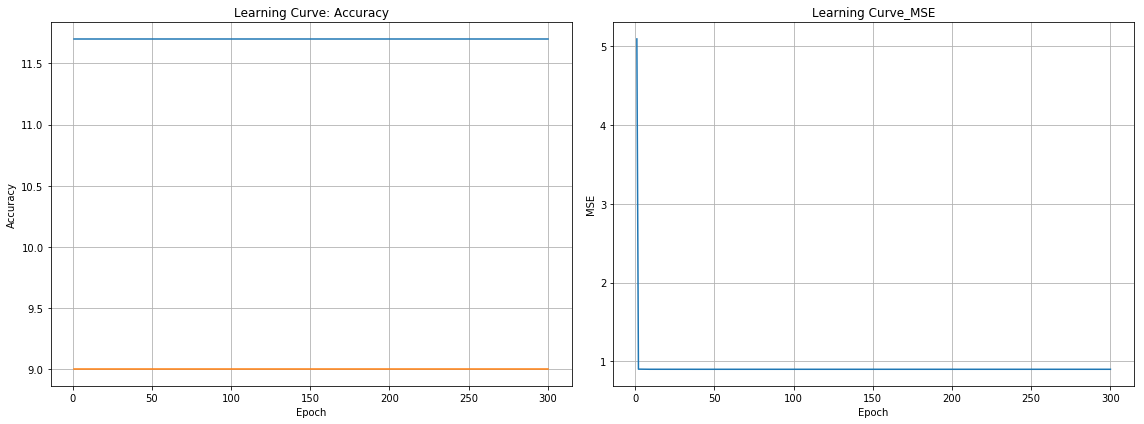

Obtained accuracy: 10.28%
-------------------------------------------
Training model with parameters:
               - Hidden Neurons: 75
               - Learning Rate: 0.1
Training time: 34.99180340766907


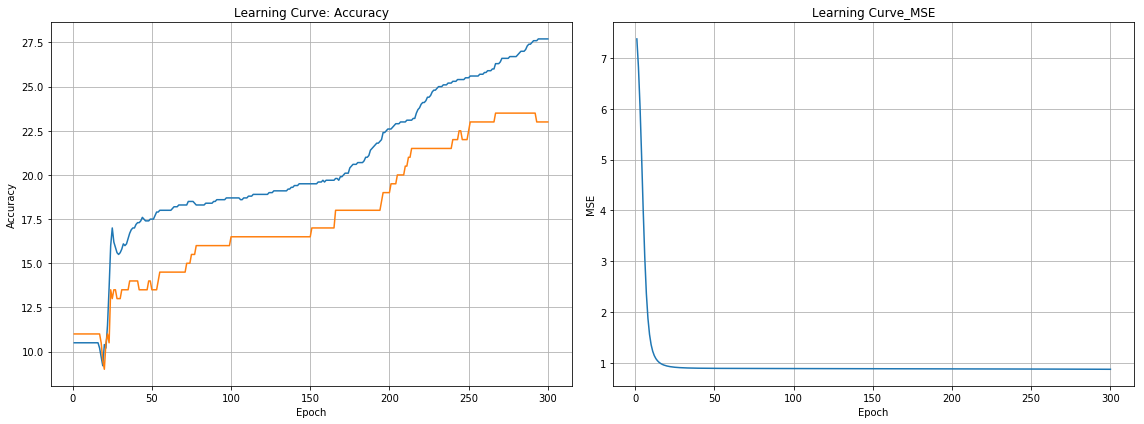

Obtained accuracy: 26.18%
-------------------------------------------
Training model with parameters:
               - Hidden Neurons: 75
               - Learning Rate: 1
Training time: 35.603737115859985


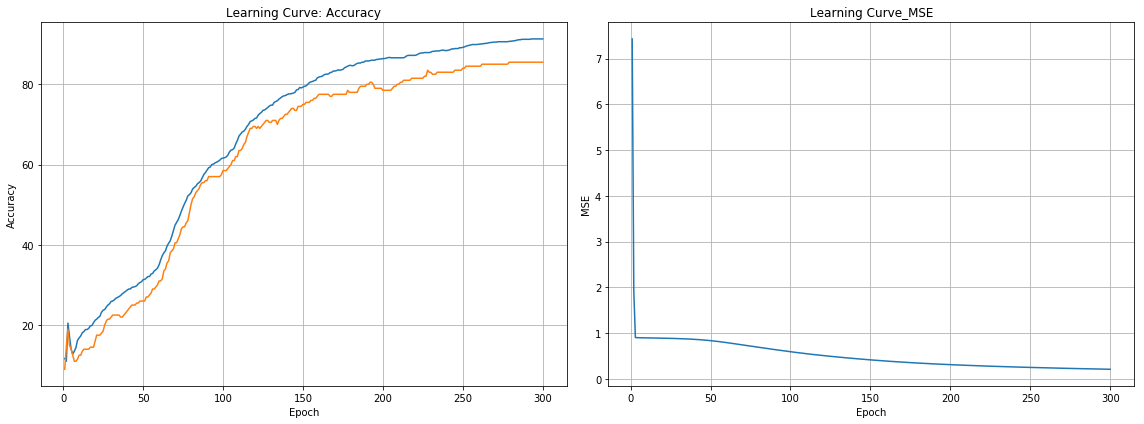

Obtained accuracy: 84.88%
-------------------------------------------
Training model with parameters:
               - Hidden Neurons: 75
               - Learning Rate: 10
Training time: 33.397172689437866


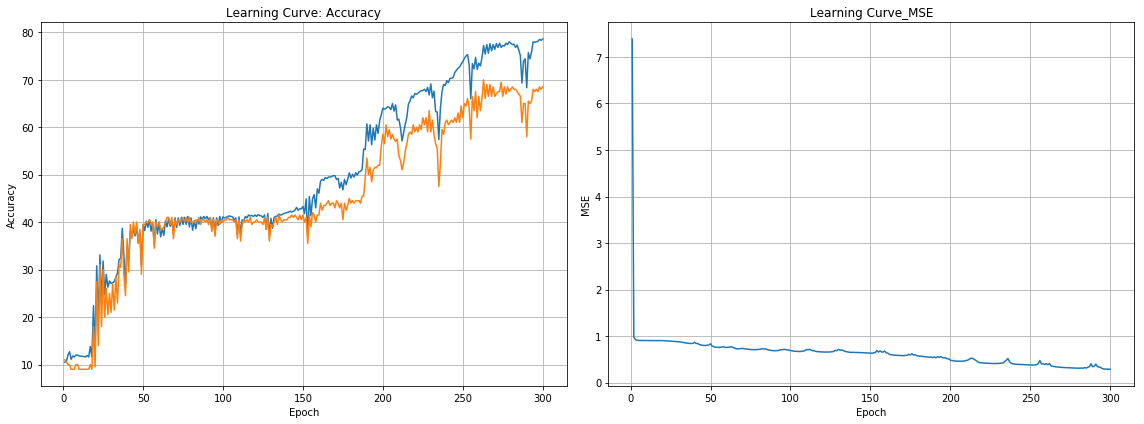

Obtained accuracy: 68.58%
-------------------------------------------


In [30]:
hidden_count = [15, 75]
learning_rates = [0.1, 1, 10]

n_iterations = 300

for hidden_layer in hidden_count:
    mnist_model = NeuralNetwork(784, hidden_layer, 10)
    for lr in learning_rates:
        print('Training model with parameters:\n \
              - Hidden Neurons: {}\n \
              - Learning Rate: {}'.format(hidden_layer, lr))
        mnist_model.train(small_training_data, small_validation_data, iterations=n_iterations, learning_rate =lr)
        # Compute accuracy
        acc = mnist_model.predict(test_data) / 100
        print('Obtained accuracy: {}%'.format(acc))
        print('-------------------------------------------')
        # Reinitialize model weights
        mnist_model.weights_init()

<b>Question 2.1.4</b>: Repeat Questions 2.1.2 and 2.1.3 on the very small datasets. You will use small_validation_data for validation.

Training model with parameters:
               - Hidden Neurons: 15
               - Learning Rate: 0.1
Training time: 2.3570125102996826


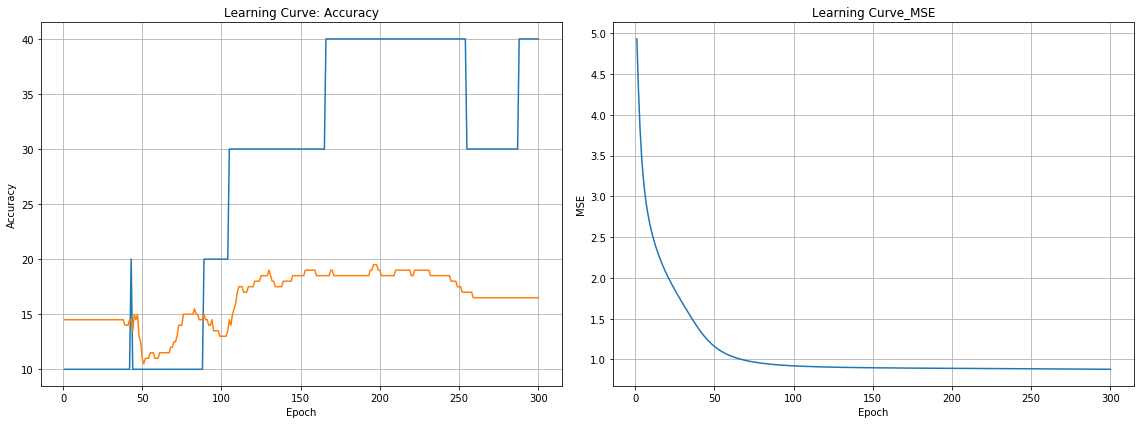

Obtained accuracy: 17.1%
-------------------------------------------
Training model with parameters:
               - Hidden Neurons: 15
               - Learning Rate: 1
Training time: 1.9997217655181885


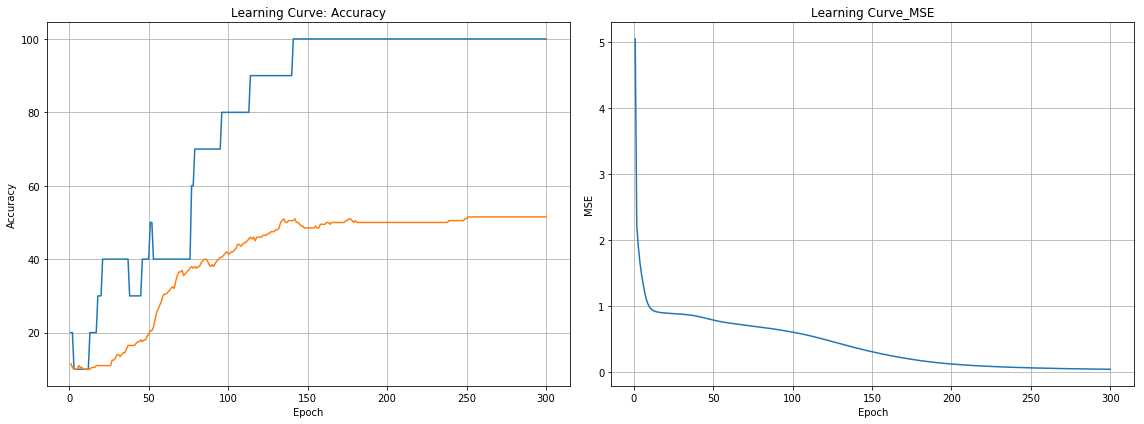

Obtained accuracy: 48.41%
-------------------------------------------
Training model with parameters:
               - Hidden Neurons: 15
               - Learning Rate: 10
Training time: 2.375501871109009


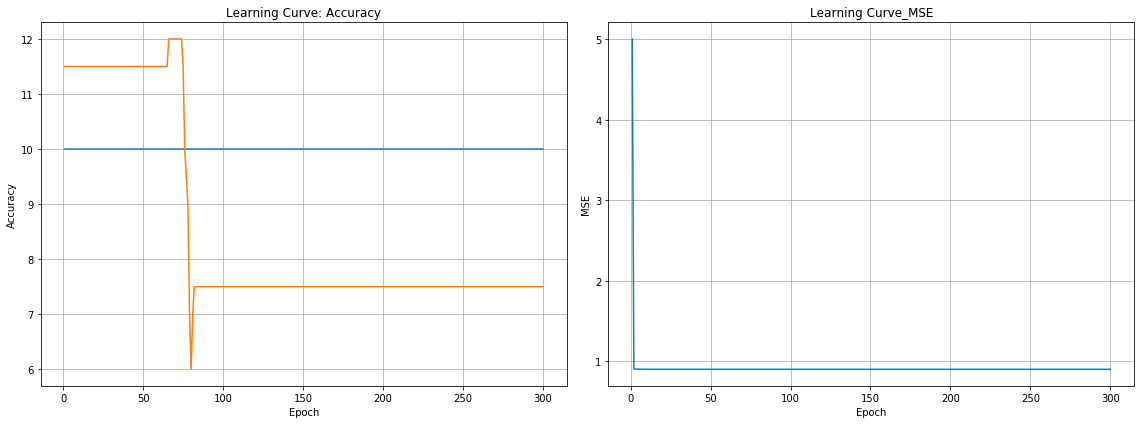

Obtained accuracy: 8.66%
-------------------------------------------
Training model with parameters:
               - Hidden Neurons: 30
               - Learning Rate: 0.1
Training time: 3.1607632637023926


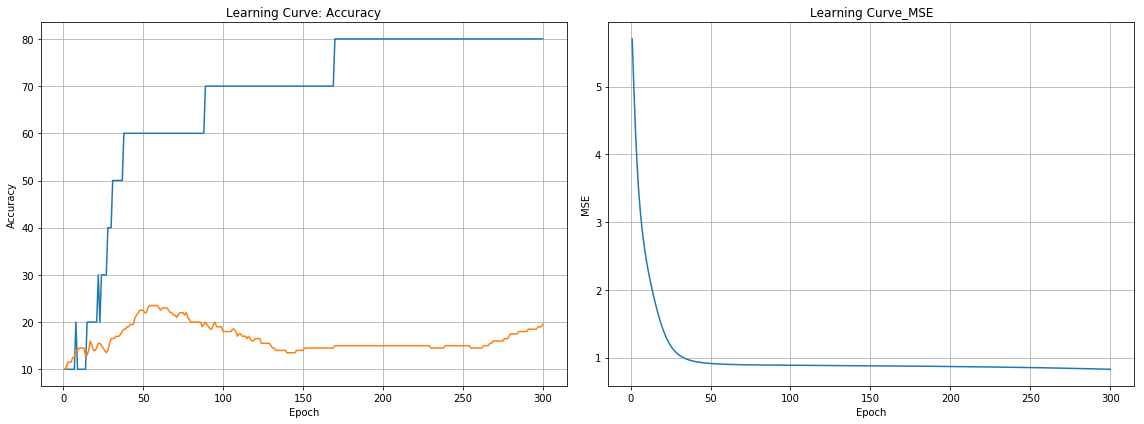

Obtained accuracy: 21.55%
-------------------------------------------
Training model with parameters:
               - Hidden Neurons: 30
               - Learning Rate: 1
Training time: 3.2850401401519775


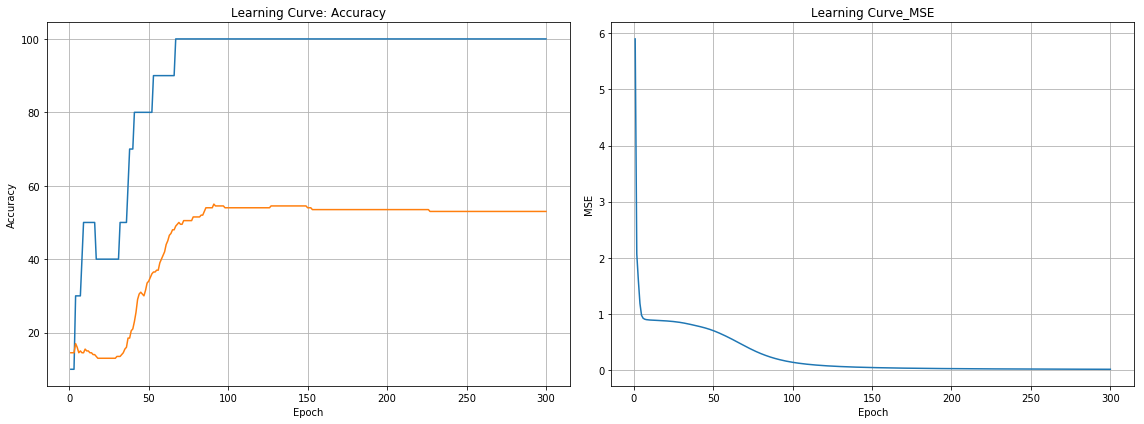

Obtained accuracy: 50.47%
-------------------------------------------
Training model with parameters:
               - Hidden Neurons: 30
               - Learning Rate: 10
Training time: 3.211700439453125


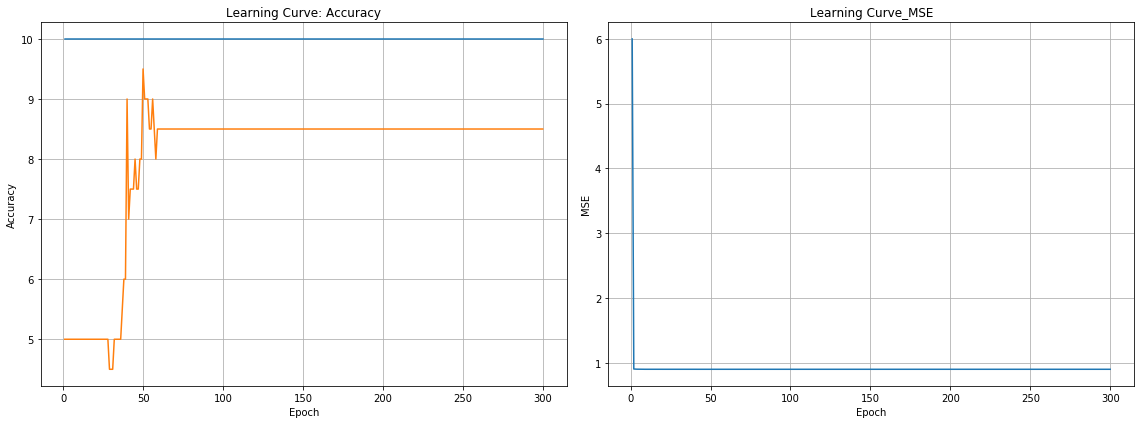

Obtained accuracy: 9.95%
-------------------------------------------
Training model with parameters:
               - Hidden Neurons: 75
               - Learning Rate: 0.1
Training time: 4.136117219924927


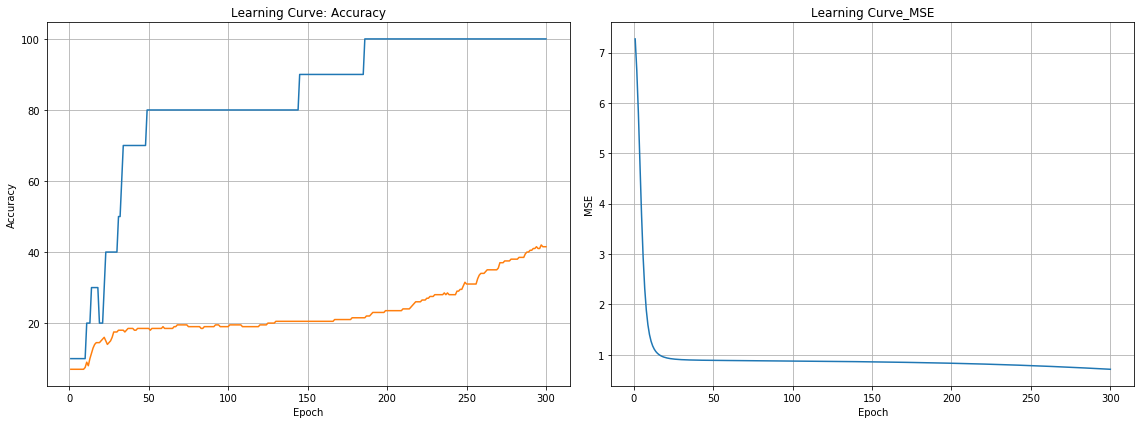

Obtained accuracy: 36.8%
-------------------------------------------
Training model with parameters:
               - Hidden Neurons: 75
               - Learning Rate: 1
Training time: 3.749537706375122


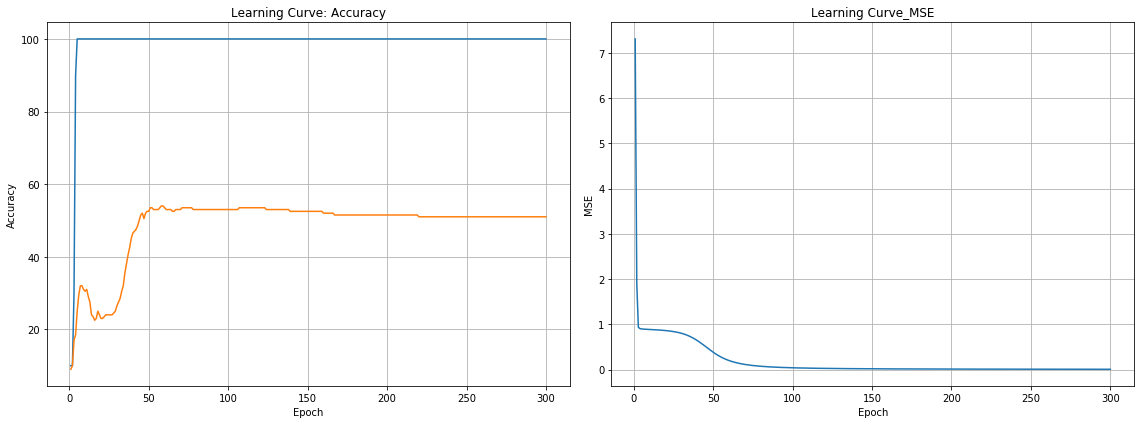

Obtained accuracy: 51.08%
-------------------------------------------
Training model with parameters:
               - Hidden Neurons: 75
               - Learning Rate: 10
Training time: 3.7616751194000244


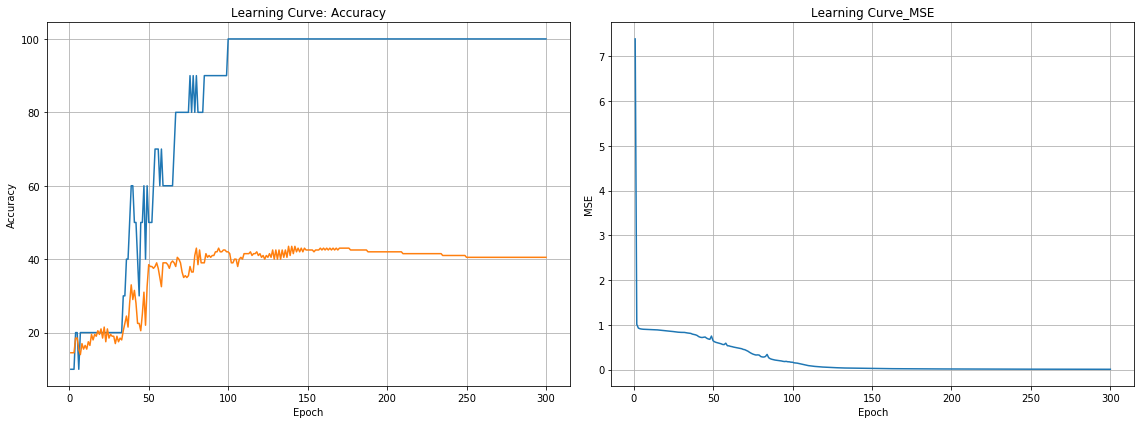

Obtained accuracy: 44.74%
-------------------------------------------


In [31]:
hidden_count = [15, 30, 75]
learning_rates = [0.1, 1, 10]

n_iterations = 300

for hidden_layer in hidden_count:
    mnist_model = NeuralNetwork(784, hidden_layer, 10)
    for lr in learning_rates:
        print('Training model with parameters:\n \
              - Hidden Neurons: {}\n \
              - Learning Rate: {}'.format(hidden_layer, lr))
        mnist_model.train(vsmall_training_data, small_validation_data, iterations=n_iterations, learning_rate =lr)
        # Compute accuracy
        acc = mnist_model.predict(test_data) / 100
        print('Obtained accuracy: {}%'.format(acc))
        print('-------------------------------------------')
        # Reinitialize model weights
        mnist_model.weights_init()

<div class='alert alert-success'>
As we can see, some models overfit. In fact, with the following configurations:
<ul>
    <li>Hidden Neurons: 15; Learning Rate: 1</li>
    <li>Hidden Neurons: 75; Learning Rate: 1</li>
    <li>Hidden Neurons: 75; Learning Rate: 10</li>
</ul>
we can see how the accuracy on the training set is very close to 100%. However, the validation accuracy is very low.
</div>

<b>Question 2.1.5</b>: Explain the results you obtained at Questions 2.1.2, 2.1.3 and 2.1.4.

<div class='alert alert-success'>
In the answer to Question 2.1.2 we can get a hint on what learning rate values could be good for our model. Specifically we see how 0.1 is too small and 10 is too high. However, the simulation with `learning_rate=1.0` provides a good model, with an accuracy which is equal to 82.84 %. This gives us the hint that we probably have to look for learning rate values around 1.<br>
In question 2.1.3 we obtained the accuracy results reported in the following table:
<br>
<table style="border-collapse: collapse;border: 1px solid black;" border="1">
  <tr>
  	<th></th>
  	<th colspan="2" align="center">Number of Hidden Layers</th>
  <tr>
  <tr>
    <th>Learning Rate</th>
    <th>15</th>
    <th>75</th>
  </tr>
  <tr>
    <th>0.1</th>
    <td align="center">12.03%</td>
    <td align="center">26.18%</td>
  </tr>
  <tr>
    <th>1</th>
    <td align="center">77.62%</td>
    <td align="center">84.88%</td>
  </tr>
  <tr>
    <th align="center">10</th>
    <td align="center">10.28%</td>
    <td align="center">68.58%</td>
  </tr>
</table>
The first thing we notice here is that, when we have 75 hidden neurons, we always have better performances with respect to having 15 neurons. Therefore we can conclude that 75 may be a good value for the hidden layer size of our model. 
<br>
In question 2.1.4, instead, we obtained the following accuracy values for each pair of hidden neurons and learning rate:
<table style="border-collapse: collapse;border: 1px solid black;" border="1">
  <tr>
  	<th></th>
  	<th colspan="3" align="center">Number of Hidden Layers</th>
  <tr>
  <tr>
    <th>Learning Rate</th>
    <th>15</th>
    <th>30</th> 
    <th>75</th>
  </tr>
  <tr>
    <th>0.1</th>
    <td align="center">17.1%</td>
    <td align="center">21.55%</td>
    <td align="center">36.8%</td>
  </tr>
  <tr>
    <th>1</th>
    <td align="center">48.41%</td>
    <td align="center">50.47%</td>
    <td align="center">51.08%</td>
  </tr>
  <tr>
    <th align="center">10</th>
    <td align="center">8.66%</td>
    <td align="center">9.95%</td>
    <td align="center">44.74%</td>
  </tr>
</table>
Those results basically confirm the observations we did in the previous two questions. Indeed accuracy values are always better when learning rate is equal to 1 or when we have 75 hidden neurons.
<br>
From question 2.1.4 results, there is an observation which contraddicts the others. Specifically, on the very small training set, we obtain higher accuracy when learning rate is 1 and when we have 15 hidden neurons. However, since it is an isolated case (all other observations suggests 75 to be a better number of hidden neurons), we can ignore this observation as estimations on very small datasets may not be as accurate as those made on bigger ones.
</div>

<b>Question 2.1.6</b>: Among all the numbers of hidden neurons and learning rates you tried in previous questions, which ones would you expect to achieve best performances on the whole dataset? Justify your answer.

<div class='alert alert-success'>
Based on our experiments I expect to have the best performances with 75 hidden neurons and a learning rate equals to 1. Certainly we could achieve even better performances by exploring both the learning rate and the hidden layer size spaces deeper but, for the sake of simplicity, I will limit my observations to the values proposed into this notebook text. Now I save those two "optimal" values so that I will be able to use them throughout the remaining parts of the notebook.
</div>

In [32]:
hidden_layer_n = 75
learning_rate = 1.0

<b>Question 2.1.7</b>: Train a model with the number of hidden neurons and the learning rate you chose in Question 2.1.6 and print its accuracy on the test set. You will use validation_data for validation. Training can be long on the whole dataset (~40 minutes): we suggest that you work on the optional part while waiting for the training to finish.

Training time: 1311.1865394115448


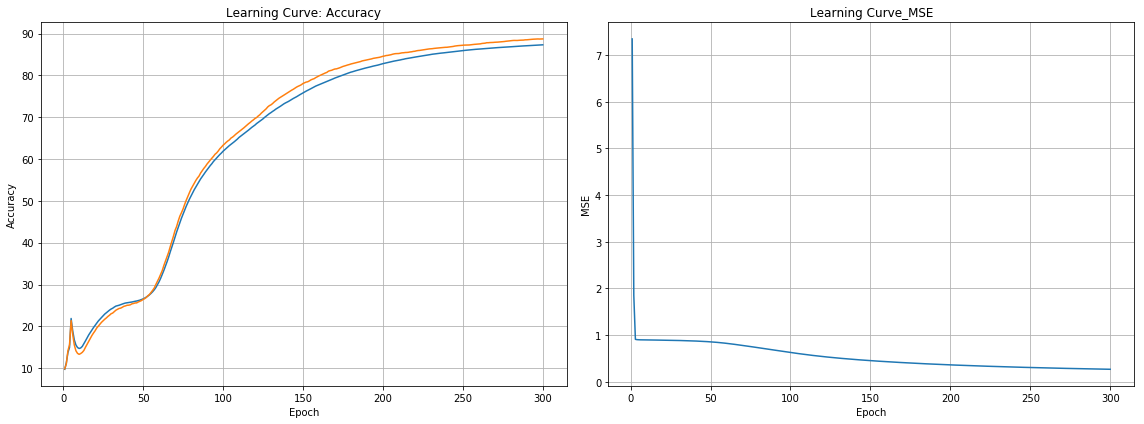

In [33]:
n_iterations = 300

mnist_model = NeuralNetwork(784, hidden_layer_n, 10)
mnist_model.train(training_data, validation_data, iterations=n_iterations, learning_rate=learning_rate)

In [34]:
# Compute accuracy
acc = mnist_model.predict(test_data) / 100
print('Obtained accuracy: {}%'.format(acc))

Obtained accuracy: 88.2%


<div class='alert alert-success'>
As we were expecting, we obtained a good accuracy value after having carefully choosen our model parameters.
<br>
<br>
However, the training function is very slow in terms of epochs. In fact, as we can notice, it tooks a lot of iterations to reach a value which is close to the final one. The reason behind this observation is that we are using a training function based on a batch gradient training approach. In order to improve the speed of our model (in terms of epochs) and to be able to make more experiments in less time, I implemented a slight variation of it, implementing a mini batch gradient training function. In this way we will be able to achieve good results using a fewer number of iterations (and eventually less computational time).
</div>

In [35]:
def split_batches(l, n):
    for i in range(0, len(l), n):
        yield l[i:i + n]

In [36]:
class NeuralNetwork(NeuralNetwork):
    def train_mb(self, data, validation_data, iterations=50, learning_rate=5.0, mb_size=10, verbose=False):
        start_time = time.time()
        training_accuracies = []
        validation_accuracies = []
        errors = []
        inputs  = data[0]
        targets = data[1]
        best_val_acc = 100*self.predict(validation_data)/len(validation_data[0])
        best_i2h_W = self.W_input_to_hidden
        best_h2o_W = self.W_hidden_to_output
        losses = list()
        for it in range(iterations):
            # Create the minibatches
            dataset = list(zip(inputs, targets))
            random.shuffle(dataset)
            error_sum = 0
            for minibatch in split_batches(dataset, batch_size):
                inputs_mb = [x[0] for x in minibatch]
                targets_mb = [x[1] for x in minibatch]
                self.feedforward(inputs_mb)
                self.backpropagate(targets_mb, learning_rate=learning_rate)
                error = np.sum(targets_mb - self.o_output)
                error *= error
                # multiply per minibatch length because we need to do weighted sum
                error_sum += error * len(targets_mb)
                
            training_accuracies.append(100*self.predict(data)/len(data[0]))
            validation_accuracies.append(100*self.predict(validation_data)/len(validation_data[0]))
            losses.append(error_sum / len(dataset))
            if validation_accuracies[-1] > best_val_acc:
                best_i2h_W = self.W_input_to_hidden
                best_h2o_W = self.W_hidden_to_output
            if verbose:
                print("[Iteration %2d/%2d]  -Training_Accuracy:  %2.2f %%  -Validation_Accuracy: %2.2f %%  -time: %2.2f " %(it+1, iterations,
                                                            training_accuracies[-1], validation_accuracies[-1], time.time() - start_time))
                print("    - MSE:", losses[-1])
        print("Training time:", time.time()-start_time)
        plot_training(range(1, iterations+1), training_accuracies, validation_accuracies, "Accuracy",
                     range(1, iterations+1), losses, 'MSE')

<div class='alert alert-success'>
Of course this new approach requires a new tuning step. In fact we need to find a new learning rate value. After running several experiment, however, I noticed that the "optimal" parameters found at the previous steps were good enough for this new model.
<br>
The additional `mb_size` parameter for the train function represents the size of each batch. If I set it to `1`, I basically execute a Stochastic Gradient Descent (SGD) training experiment.
<br>
The batch training algorithm is supposed to be faster in terms of epochs because it is supposed to reach good results earlier as it performs more frequent updates to the weights. However, if we use the same number of epochs as the batch gradient descent we do not obtain any gain in terms of running speed (which is what we would like to achieve at the end). 
<br>
Having a huge number of epochs is not crucial in the minibatch training. Indeed, as already stated, it is supposed to reach good results quite early during its training stage. Therefore we may try to achieve some good results using a smaller number of iterations with respect to the previous experiments.
<br>
<br>
Firstly, I will execute the SGD training using the same number of hidden neurons and the same learning rate as before, but using just `50` epochs. I will run this experiment on the small dataset because I am just interested in verifying that my implementation actually works. In fact, I expect the accuracy plot to reach a region around the final accuracy level in a very small number of epochs.
</div>

Training time: 43.064544677734375


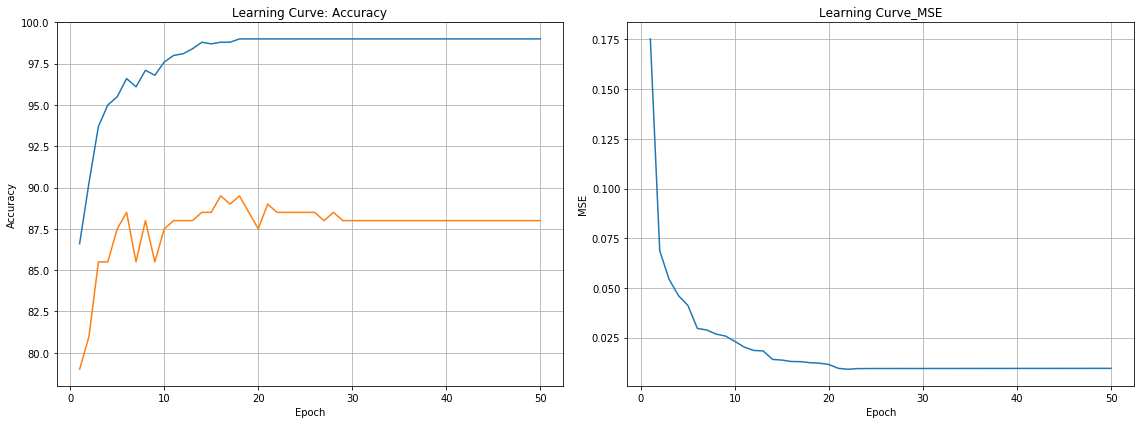

In [37]:
n_iterations = 50
batch_size = 1

mnist_model = NeuralNetwork(784, hidden_layer_n, 10)
mnist_model.train_mb(small_training_data, small_validation_data, iterations=n_iterations, learning_rate=learning_rate, mb_size=batch_size)

<div class='alert alert-success'>
Running the SGD training I obtained exactly what I described above in terms of accuracy evolution. In fact, we reach an accuracy value which is close to the final one in around 10 epochs. Please note that in the above plot I am showing just `50` epochs, not `300` as before.
<br>
<br>
Now I will run a mini batch gradient descent training as explained above. Again I will use just `50` epochs in order to obtain a gain in terms of execution time. I expect this model to be slower in reaching a good accuracy value with respect to the SGD one, but still faster with respect to the batch gradient descent training. I will run the minibatch gradient training on the whole dataset.
</div>

Training time: 290.0554106235504


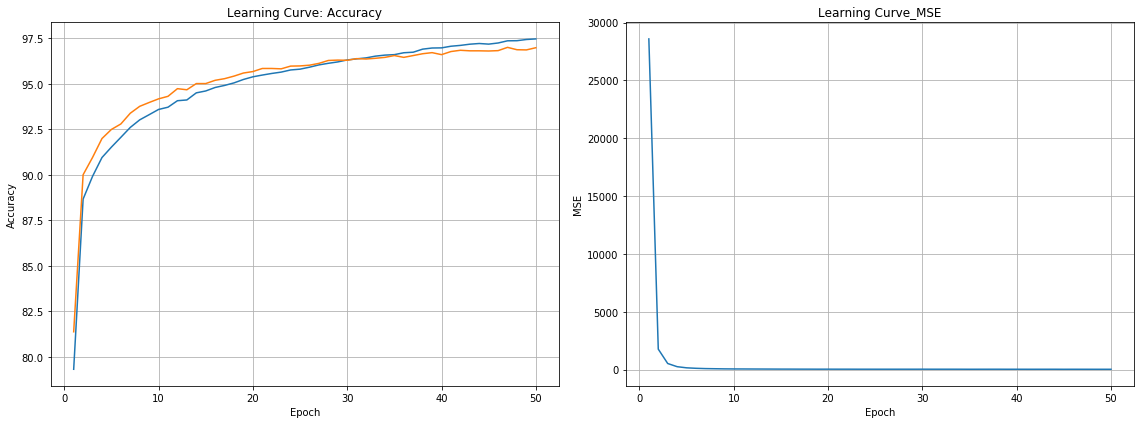

In [38]:
n_iterations = 50
batch_size = 256

mnist_model = NeuralNetwork(784, hidden_layer_n, 10)
mnist_model.train_mb(training_data, validation_data, iterations=n_iterations, learning_rate=learning_rate, mb_size=batch_size)

In [39]:
# Compute accuracy
acc = mnist_model.predict(test_data) / 100
print('Obtained accuracy: {}%'.format(acc))

Obtained accuracy: 96.57%


<div class='alert alert-success'>
As we can see from the training time, the mini batch gradient descent is faster because we used much less epochs to compute our result. In fact it computed in approximatelly one quarter of the time of the previous model (around 5 minutes against 20 minutes).
<br>
After trying many minibatch sizes, the best performances in terms of accuracy were obtained with minibatch size equals to `256` over `50` epochs. In fact, its accuracy on the test set is close to 97% which is quite an impressive result.
<br>
The mini batch gradient training is less noisy with respect to the SGD training because it computes less frequent updates. Indeed, those updates are evaluated on mini batches instead that on single input points.
</div>

<b>Part 2 (optional)</b>: Another loss function

In classification problems, we usually replace the sigmoids in the output layer by a "softmax" function and the MSE loss by a "cross-entropy" loss. More formally, let $u = (u_1, ..., u_n)$ be the vector representing the activation of the output layer of a Neural Network. The output of that neural network is $o = (o_1, ..., o_n) = \textrm{softmax}(u)$, and

<div align="center" style="font-size: large">$\textrm{softmax}(u) = (\frac{e^{u_1}}{\sum_{k=1}^n e^{u_k}}, ..., \frac{e^{u_n}}{\sum_{k=1}^n e^{u_k}})$.</div>

If $t = (t_1, ..., t_n)$ is a vector of non-negative targets such that $\sum_{k=1}^n t_k = 1$ (which is the case in classification problems, where one target is equal to 1 and all others are equal to 0), then the cross-entropy loss is defined as follows:

<div align="center">$L_{xe}(o, t) = - \sum_{k=1}^n t_k\log(o_k)$.</div>

<b>Question 2.2.1</b>: Let $L_{xe}$ be the cross-entropy loss function and $u_i$, $i \in \lbrace 1, ..., n \rbrace$, be the activations of the output neurons. Let us assume that the transfer function of the output neurons is the softmax function. Targets are $t_1, ..., t_n$. Derive a formula for $\frac{\partial L_{xe}}{\partial u_i}$ (details of your calculations are not required).

<span style="font-size: 24px">
$\frac{\partial L_{xe}}{\partial u_i} = \frac{\partial L_{xe}}{\partial o_i} \frac{\partial o_{i}}{\partial u_i} =  o_{i} - t_{i} $
</span>

<b>Question 2.2.2</b>: Implement a new feedforward() function and a new backpropagate() function adapted to the cross-entropy loss instead of the MSE loss.

In [40]:
class NeuralNetwork(NeuralNetwork):
    def feedforward_xe(self, inputs):
        self.o_input = np.array(inputs)
        # Append the bias to the input vector
        if len(inputs[0]) < self.input_layer_size:
            self.o_input = np.append(self.o_input, np.ones((len(inputs), 1)), axis=1)
        # Compute output for the first hidden layer
        self.u_hidden = np.dot(self.o_input, self.W_input_to_hidden)
        self.o_hidden = self.transfer_f(self.u_hidden)
        # Append the bias again
        if len(self.o_hidden[0]) < self.hidden_layer_size:
            self.o_hidden = np.append(self.o_hidden, np.ones((len(self.o_hidden), 1)), axis=1)
        # Compute network output
        self.u_output = np.dot(self.o_hidden, self.W_hidden_to_output)
        self.o_output = softmax(self.u_output)

    def backpropagate_xe(self, targets, learning_rate=5.0):
        # Compute the error derivatives w.r.t. the activation for each layer
        dE_du_hidden = self.o_output - targets

        dE_du_output = np.multiply(dE_du_hidden.dot(self.W_hidden_to_output.T), 
                                   self.o_hidden * (1 - self.o_hidden)
                                  )
        dE_du_output = np.delete(dE_du_output, -1, axis=1)

        # Compute error's derivatives w.r.t. the weights
        dE_dw_hidden = (1/len(targets)) * np.dot(dE_du_hidden.T, self.o_hidden).T
        dE_dw_output = (1/len(targets)) * np.dot(dE_du_output.T, self.o_input).T
        
        # Update weights
        self.W_hidden_to_output -= learning_rate * dE_dw_hidden
        self.W_input_to_hidden -= learning_rate * dE_dw_output

<div class='alert alert-success'>
Since we will be using our new feedforward and backpropagation functions, we also need to create a new predict function which will call the feedforward_xe function.
</div>

In [41]:
class NeuralNetwork(NeuralNetwork):
    def predict_xe(self, test_data):
        """ Evaluate performance by counting how many examples in test_data are correctly 
            evaluated. """
        self.feedforward_xe(test_data[0])
        answer = np.argmax(test_data[1], axis=1)
        prediction = np.argmax(self.o_output, axis=1)
        count = len(test_data[0]) - np.count_nonzero(answer - prediction)
        return count 

<div class='alert alert-success'>
I am also redefining the train_xe function because I want it to produce two plots, similarly to what I did above.
</div>

In [42]:
class NeuralNetwork(NeuralNetwork):
    def train_xe(self, data, validation_data, iterations=50, learning_rate=5.0, verbose=False):
        start_time = time.time()
        training_accuracies = []
        validation_accuracies = []
        errors = []
        xes = []
        inputs  = data[0]
        targets = data[1]
        best_val_acc = 100*self.predict(validation_data)/len(validation_data[0])
        best_i2h_W = self.W_input_to_hidden
        best_h2o_W = self.W_hidden_to_output
        losses = list()
        for it in range(iterations):
            self.feedforward_xe(inputs)
            self.backpropagate_xe(targets, learning_rate=learning_rate)
            xe = targets*np.log(self.o_output)*(-1)
            error = targets - self.o_output
            error *= error
            training_accuracies.append(100*self.predict_xe(data)/len(data[0]))
            validation_accuracies.append(100*self.predict_xe(validation_data)/len(validation_data[0]))
            losses.append(np.sum(xe)/len(targets))
            if validation_accuracies[-1] > best_val_acc:
                best_i2h_W = self.W_input_to_hidden
                best_h2o_W = self.W_hidden_to_output
            if verbose:
                print("[Iteration %2d/%2d]  -Training_Accuracy:  %2.2f %%  -Validation_Accuracy: %2.2f %%  -time: %2.2f " %(it+1, iterations,
                                                            training_accuracies[-1], validation_accuracies[-1], time.time() - start_time))
                print("    - MSE:", np.sum(error)/len(targets))
                print("    - X-Entropy:", losses[-1])
        print("Training time:", time.time()-start_time)
        self.W_input_to_hidden = best_i2h_W
        self.W_hidden_to_output = best_h2o_W
        plot_training(range(1, iterations+1), training_accuracies, validation_accuracies, "Accuracy",
                     range(1, iterations+1), losses, 'X-Entropy')

<b>Question 2.2.3</b>: Create a new Neural Network with the same architecture as in Question 2.1.1 and train it using the softmax cross-entropy loss.

Training time: 35.726393699645996


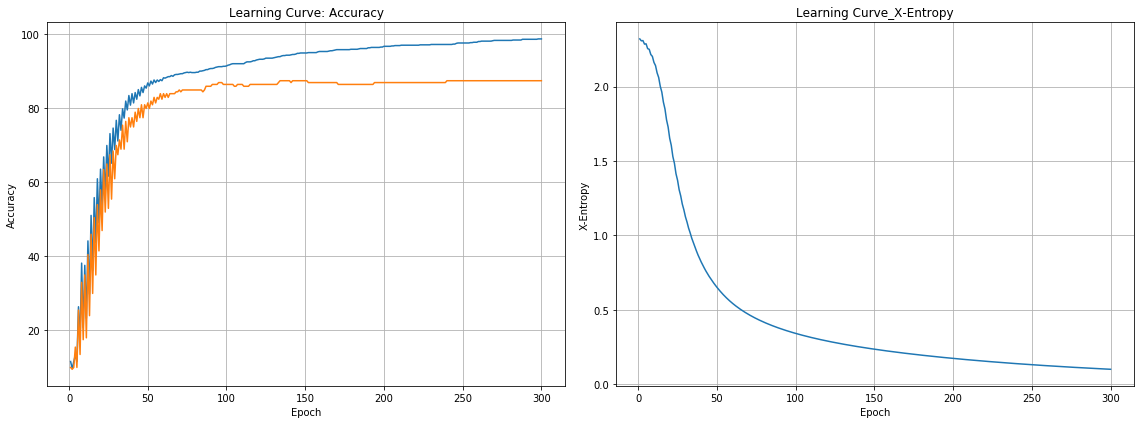

In [43]:
n_iterations = 300

# Define your neural network
mnist_model_xe = NeuralNetwork(784, hidden_layer_n, 10, sigmoid, dsigmoid)

# Train NN and print accuracy on validation data
# We will use the same "good" learning rate found at question 2.1.6
mnist_model_xe.train_xe(small_training_data, small_validation_data, 
                        iterations=n_iterations, learning_rate=learning_rate)

In [44]:
# Compute accuracy
acc = mnist_model_xe.predict_xe(test_data) / 100
print('Obtained accuracy: {}%\n'.format(acc))

Obtained accuracy: 87.08%



<b>Question 2.2.4</b>: Compare your results with the MSE loss and with the cross-entropy loss.

<div class='alert alert-success'>
As the training was performed on the small dataset (for the interest of time), I will compare the results obtained in cross-entropy loss with those obtained while tuning the parameters in questions 2.1.2 and 2.1.3. Specifically I will compare the results of question 2.2.3 with those obtained while training my model with 75 hidden layers and a learning rate value equals to 1 on the small training set. The mentioned model produced an 84.88% accuracy value.
<br>
<br>
The model based on cross-entropy loss produced a slightly better accuracy value (87.08%) when trained using the same parameters used for the model based on MSE. Another clear advantage which we can see from the accuracy plots, is that the cross-entropy loss model reached good accuracy results earlier with respect to the other model.  Therefore we could have used less number of iterations for the cross-entropy model and we would have still produced better (or similar) results with respect to the other model. This would be a relevant advantage in situations where the training speed is an important requirement.
<br>
However we could have obtained the same result just by using minibatch training on the model using MSE loss.
<br>
In general cross-entropy is prefered for classification, while mean squared error is one of the best choices for regression. Therefore the usage of those two functions depends on what we are doing.
<br>
<br>
For the sake of completeness I will now implement a minibatch gradient descent training function also for the cross-entropy loss based model.
</div>

In [45]:
class NeuralNetwork(NeuralNetwork):
    def train_xe_mb(self, data, validation_data, iterations=50, learning_rate=5.0, batch_size=10, verbose=False):
        start_time = time.time()
        training_accuracies = []
        validation_accuracies = []
        errors = []
        xes = []
        inputs  = data[0]
        targets = data[1]
        best_val_acc = 100*self.predict_xe(validation_data)/len(validation_data[0])
        best_i2h_W = self.W_input_to_hidden
        best_h2o_W = self.W_hidden_to_output
        losses = list()
        for it in range(iterations):
            # Create the minibatches
            dataset = list(zip(inputs, targets))
            random.shuffle(dataset)
            error_sum, xe_sum = 0, 0
            for minibatch in split_batches(dataset, batch_size):
                inputs_mb = [x[0] for x in minibatch]
                targets_mb = [x[1] for x in minibatch]
                self.feedforward_xe(inputs_mb)
                self.backpropagate_xe(targets_mb, learning_rate=learning_rate)
                xe = np.sum(targets_mb*np.log(self.o_output)*(-1))
                xe_sum += xe * len(targets_mb)
                error = np.sum(targets_mb - self.o_output)
                error *= error
                # multiply per minibatch length because we need to do weighted sum
                error_sum += error * len(targets_mb)
                
            training_accuracies.append(100*self.predict_xe(data)/len(data[0]))
            validation_accuracies.append(100*self.predict_xe(validation_data)/len(validation_data[0]))
            losses.append(xe_sum/len(targets))
            if validation_accuracies[-1] > best_val_acc:
                best_i2h_W = self.W_input_to_hidden
                best_h2o_W = self.W_hidden_to_output
            if verbose:
                print("[Iteration %2d/%2d]  -Training_Accuracy:  %2.2f %%  -Validation_Accuracy: %2.2f %%  -time: %2.2f " %(it+1, iterations,
                                                            training_accuracies[-1], validation_accuracies[-1], time.time() - start_time))
                print("    - MSE:", error_sum/len(targets))
                print("    - X-Entropy:", losses[-1])
        print("Training time:", time.time()-start_time)
        self.W_input_to_hidden = best_i2h_W
        self.W_hidden_to_output = best_h2o_W
        plot_training(range(1, iterations+1), training_accuracies, validation_accuracies, "Accuracy",
                     range(1, iterations+1), losses, 'X-Entropy')

Training time: 6.0838446617126465


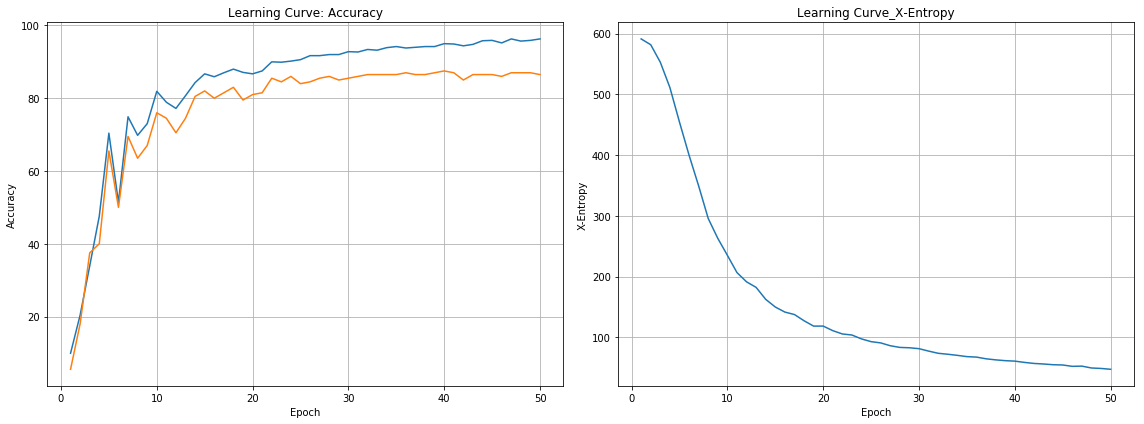

In [46]:
n_iterations = 50
batch_size = 256

# Define your neural network
mnist_model_xe = NeuralNetwork(784, hidden_layer_n, 10, sigmoid, dsigmoid)

# Train 
mnist_model_xe.train_xe_mb(small_training_data, small_validation_data, 
                           iterations=n_iterations, learning_rate=learning_rate, batch_size=batch_size)

In [47]:
# Compute accuracy
acc = mnist_model_xe.predict(test_data) / 100
print('Obtained accuracy: {}%\n'.format(acc))

Obtained accuracy: 87.02%



<div class='alert alert-success'>
The above plot just confirms all the observations I already made on the differences between the batch gradient training and the mini batch approach. Indeed, we are reaching an accuracy value which is very similar to the one obtained through batch gradient training but in less epochs and, consequently, in less computational time.
</div>

<div align="center"><b>THE END!</b>